The goal is to do binary classification on the make_moons dataset from sklearn.

It is utilized a neural nerwork based on relu and sigmoid activation functions

In [4]:
from mlswarm.mlswarm import neuralnet 

#DATASET-------------------------------
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, Y = make_moons(n_samples = 2000, noise=0.2, random_state=100)
Y = Y.reshape((Y.shape[0],1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [5]:
nn_architecture = [
    {"input_dim": 2, "output_dim": 5, "activation": "relu"},
    {"input_dim": 5, "output_dim": 10, "activation": "relu"},
    {"input_dim": 10, "output_dim": 5, "activation": "relu"},
    {"input_dim": 5, "output_dim": 1, "activation": "sigmoid"},
]

#CREATE NEURAL NETWORK
nn = neuralnet(nn_architecture)

#INITIALIZE CLOUD WITH 150 PARTICLES ACCORDING TO XAVIER INITIALIZATION
nn.init_cloud(N = 150)

#Start training using default parameters
nn.train(X_train, Y_train, {'cost_type': 'rmse',
                            'algorithm': 'euler_adaptive',
                            'max_epochs': 1000,
                            'kernel_a': 0.01,
                            'lerning_rate': 0.1,
                            'alpha_rate': 1,
                            'verbose': True})


Training started...
Iteration: 00000 - Cloud mean cost: 0.25133 - Cloud variance: 0.46757
Iteration: 00001 - Cloud mean cost: 0.25138 - Cloud variance: 0.46771
Iteration: 00002 - Cloud mean cost: 0.25152 - Cloud variance: 0.47211
Iteration: 00003 - Cloud mean cost: 0.25170 - Cloud variance: 0.48620
Iteration: 00004 - Cloud mean cost: 0.25191 - Cloud variance: 0.50009
Iteration: 00005 - Cloud mean cost: 0.25214 - Cloud variance: 0.51374
Iteration: 00006 - Cloud mean cost: 0.25239 - Cloud variance: 0.52713
Iteration: 00007 - Cloud mean cost: 0.25265 - Cloud variance: 0.54025
Iteration: 00008 - Cloud mean cost: 0.25293 - Cloud variance: 0.55307
Iteration: 00009 - Cloud mean cost: 0.25323 - Cloud variance: 0.56559
Iteration: 00010 - Cloud mean cost: 0.25353 - Cloud variance: 0.57778
Iteration: 00011 - Cloud mean cost: 0.25386 - Cloud variance: 0.58962
Iteration: 00012 - Cloud mean cost: 0.25419 - Cloud variance: 0.60111
Iteration: 00013 - Cloud mean cost: 0.25453 - Cloud variance: 0.61222

Iteration: 00117 - Cloud mean cost: 0.25714 - Cloud variance: 0.43517
Iteration: 00118 - Cloud mean cost: 0.25696 - Cloud variance: 0.43053
Iteration: 00119 - Cloud mean cost: 0.25676 - Cloud variance: 0.42592
Iteration: 00120 - Cloud mean cost: 0.25654 - Cloud variance: 0.42136
Iteration: 00121 - Cloud mean cost: 0.25630 - Cloud variance: 0.41685
Iteration: 00122 - Cloud mean cost: 0.25605 - Cloud variance: 0.41239
Iteration: 00123 - Cloud mean cost: 0.25580 - Cloud variance: 0.40797
Iteration: 00124 - Cloud mean cost: 0.25553 - Cloud variance: 0.40361
Iteration: 00125 - Cloud mean cost: 0.25526 - Cloud variance: 0.39931
Iteration: 00126 - Cloud mean cost: 0.25500 - Cloud variance: 0.39506
Iteration: 00127 - Cloud mean cost: 0.25473 - Cloud variance: 0.39086
Iteration: 00128 - Cloud mean cost: 0.25447 - Cloud variance: 0.38672
Iteration: 00129 - Cloud mean cost: 0.25419 - Cloud variance: 0.38263
Iteration: 00130 - Cloud mean cost: 0.25391 - Cloud variance: 0.37859
Iteration: 00131 - C

Iteration: 00235 - Cloud mean cost: 0.09017 - Cloud variance: 0.07629
Iteration: 00236 - Cloud mean cost: 0.08980 - Cloud variance: 0.07527
Iteration: 00237 - Cloud mean cost: 0.08942 - Cloud variance: 0.07427
Iteration: 00238 - Cloud mean cost: 0.08904 - Cloud variance: 0.07330
Iteration: 00239 - Cloud mean cost: 0.08866 - Cloud variance: 0.07235
Iteration: 00240 - Cloud mean cost: 0.08828 - Cloud variance: 0.07142
Iteration: 00241 - Cloud mean cost: 0.08789 - Cloud variance: 0.07051
Iteration: 00242 - Cloud mean cost: 0.08750 - Cloud variance: 0.06963
Iteration: 00243 - Cloud mean cost: 0.08710 - Cloud variance: 0.06876
Iteration: 00244 - Cloud mean cost: 0.08670 - Cloud variance: 0.06791
Iteration: 00245 - Cloud mean cost: 0.08630 - Cloud variance: 0.06709
Iteration: 00246 - Cloud mean cost: 0.08589 - Cloud variance: 0.06627
Iteration: 00247 - Cloud mean cost: 0.08548 - Cloud variance: 0.06548
Iteration: 00248 - Cloud mean cost: 0.08508 - Cloud variance: 0.06470
Iteration: 00249 - C

Iteration: 00353 - Cloud mean cost: 0.05775 - Cloud variance: 0.02701
Iteration: 00354 - Cloud mean cost: 0.05753 - Cloud variance: 0.02683
Iteration: 00355 - Cloud mean cost: 0.05731 - Cloud variance: 0.02666
Iteration: 00356 - Cloud mean cost: 0.05709 - Cloud variance: 0.02648
Iteration: 00357 - Cloud mean cost: 0.05687 - Cloud variance: 0.02631
Iteration: 00358 - Cloud mean cost: 0.05665 - Cloud variance: 0.02614
Iteration: 00359 - Cloud mean cost: 0.05642 - Cloud variance: 0.02596
Iteration: 00360 - Cloud mean cost: 0.05620 - Cloud variance: 0.02579
Iteration: 00361 - Cloud mean cost: 0.05597 - Cloud variance: 0.02562
Iteration: 00362 - Cloud mean cost: 0.05574 - Cloud variance: 0.02545
Iteration: 00363 - Cloud mean cost: 0.05551 - Cloud variance: 0.02528
Iteration: 00364 - Cloud mean cost: 0.05528 - Cloud variance: 0.02512
Iteration: 00365 - Cloud mean cost: 0.05506 - Cloud variance: 0.02495
Iteration: 00366 - Cloud mean cost: 0.05484 - Cloud variance: 0.02478
Iteration: 00367 - C

Iteration: 00471 - Cloud mean cost: 0.04143 - Cloud variance: 0.01380
Iteration: 00472 - Cloud mean cost: 0.04137 - Cloud variance: 0.01375
Iteration: 00473 - Cloud mean cost: 0.04130 - Cloud variance: 0.01369
Iteration: 00474 - Cloud mean cost: 0.04124 - Cloud variance: 0.01363
Iteration: 00475 - Cloud mean cost: 0.04118 - Cloud variance: 0.01358
Iteration: 00476 - Cloud mean cost: 0.04113 - Cloud variance: 0.01353
Iteration: 00477 - Cloud mean cost: 0.04108 - Cloud variance: 0.01347
Iteration: 00478 - Cloud mean cost: 0.04104 - Cloud variance: 0.01342
Iteration: 00479 - Cloud mean cost: 0.04099 - Cloud variance: 0.01337
Iteration: 00480 - Cloud mean cost: 0.04095 - Cloud variance: 0.01332
Iteration: 00481 - Cloud mean cost: 0.04091 - Cloud variance: 0.01327
Iteration: 00482 - Cloud mean cost: 0.04086 - Cloud variance: 0.01322
Iteration: 00483 - Cloud mean cost: 0.04082 - Cloud variance: 0.01317
Iteration: 00484 - Cloud mean cost: 0.04078 - Cloud variance: 0.01312
Iteration: 00485 - C

Iteration: 00589 - Cloud mean cost: 0.03899 - Cloud variance: 0.01022
Iteration: 00590 - Cloud mean cost: 0.03898 - Cloud variance: 0.01020
Iteration: 00591 - Cloud mean cost: 0.03897 - Cloud variance: 0.01017
Iteration: 00592 - Cloud mean cost: 0.03895 - Cloud variance: 0.01015
Iteration: 00593 - Cloud mean cost: 0.03894 - Cloud variance: 0.01013
Iteration: 00594 - Cloud mean cost: 0.03893 - Cloud variance: 0.01010
Iteration: 00595 - Cloud mean cost: 0.03892 - Cloud variance: 0.01008
Iteration: 00596 - Cloud mean cost: 0.03891 - Cloud variance: 0.01005
Iteration: 00597 - Cloud mean cost: 0.03890 - Cloud variance: 0.01003
Iteration: 00598 - Cloud mean cost: 0.03888 - Cloud variance: 0.01000
Iteration: 00599 - Cloud mean cost: 0.03886 - Cloud variance: 0.00998
Iteration: 00600 - Cloud mean cost: 0.03885 - Cloud variance: 0.00995
Iteration: 00601 - Cloud mean cost: 0.03883 - Cloud variance: 0.00993
Iteration: 00602 - Cloud mean cost: 0.03881 - Cloud variance: 0.00990
Iteration: 00603 - C

Iteration: 00707 - Cloud mean cost: 0.03484 - Cloud variance: 0.00742
Iteration: 00708 - Cloud mean cost: 0.03482 - Cloud variance: 0.00740
Iteration: 00709 - Cloud mean cost: 0.03481 - Cloud variance: 0.00739
Iteration: 00710 - Cloud mean cost: 0.03479 - Cloud variance: 0.00737
Iteration: 00711 - Cloud mean cost: 0.03477 - Cloud variance: 0.00736
Iteration: 00712 - Cloud mean cost: 0.03476 - Cloud variance: 0.00734
Iteration: 00713 - Cloud mean cost: 0.03474 - Cloud variance: 0.00733
Iteration: 00714 - Cloud mean cost: 0.03472 - Cloud variance: 0.00732
Iteration: 00715 - Cloud mean cost: 0.03471 - Cloud variance: 0.00730
Iteration: 00716 - Cloud mean cost: 0.03469 - Cloud variance: 0.00729
Iteration: 00717 - Cloud mean cost: 0.03467 - Cloud variance: 0.00727
Iteration: 00718 - Cloud mean cost: 0.03466 - Cloud variance: 0.00726
Iteration: 00719 - Cloud mean cost: 0.03464 - Cloud variance: 0.00724
Iteration: 00720 - Cloud mean cost: 0.03463 - Cloud variance: 0.00723
Iteration: 00721 - C

Iteration: 00826 - Cloud mean cost: 0.03391 - Cloud variance: 0.00599
Iteration: 00827 - Cloud mean cost: 0.03391 - Cloud variance: 0.00599
Iteration: 00828 - Cloud mean cost: 0.03391 - Cloud variance: 0.00598
Iteration: 00829 - Cloud mean cost: 0.03392 - Cloud variance: 0.00597
Iteration: 00830 - Cloud mean cost: 0.03392 - Cloud variance: 0.00596
Iteration: 00831 - Cloud mean cost: 0.03393 - Cloud variance: 0.00595
Iteration: 00832 - Cloud mean cost: 0.03393 - Cloud variance: 0.00594
Iteration: 00833 - Cloud mean cost: 0.03394 - Cloud variance: 0.00593
Iteration: 00834 - Cloud mean cost: 0.03394 - Cloud variance: 0.00592
Iteration: 00835 - Cloud mean cost: 0.03394 - Cloud variance: 0.00591
Iteration: 00836 - Cloud mean cost: 0.03395 - Cloud variance: 0.00590
Iteration: 00837 - Cloud mean cost: 0.03395 - Cloud variance: 0.00589
Iteration: 00838 - Cloud mean cost: 0.03395 - Cloud variance: 0.00589
Iteration: 00839 - Cloud mean cost: 0.03396 - Cloud variance: 0.00588
Iteration: 00840 - C

Iteration: 00945 - Cloud mean cost: 0.03250 - Cloud variance: 0.00500
Iteration: 00946 - Cloud mean cost: 0.03248 - Cloud variance: 0.00499
Iteration: 00947 - Cloud mean cost: 0.03247 - Cloud variance: 0.00498
Iteration: 00948 - Cloud mean cost: 0.03245 - Cloud variance: 0.00498
Iteration: 00949 - Cloud mean cost: 0.03244 - Cloud variance: 0.00497
Iteration: 00950 - Cloud mean cost: 0.03242 - Cloud variance: 0.00496
Iteration: 00951 - Cloud mean cost: 0.03239 - Cloud variance: 0.00496
Iteration: 00952 - Cloud mean cost: 0.03237 - Cloud variance: 0.00495
Iteration: 00953 - Cloud mean cost: 0.03234 - Cloud variance: 0.00494
Iteration: 00954 - Cloud mean cost: 0.03231 - Cloud variance: 0.00494
Iteration: 00955 - Cloud mean cost: 0.03228 - Cloud variance: 0.00493
Iteration: 00956 - Cloud mean cost: 0.03226 - Cloud variance: 0.00492
Iteration: 00957 - Cloud mean cost: 0.03223 - Cloud variance: 0.00492
Iteration: 00958 - Cloud mean cost: 0.03220 - Cloud variance: 0.00491
Iteration: 00959 - C

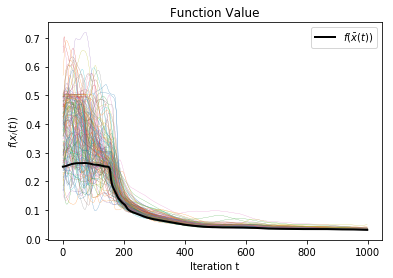

Test set accuracy using neuralnet 0: 0.97000
Test set accuracy using best neuralnet: 0.97250


In [6]:
#PLOT COST HISTORY
nn.plot_cost_history()

#ACCURACY ON TEST SET USING PARTICLE 0 WEIGHTS
nn.prediction_accuracy_particle(X_test, Y_test, acc_type = "sigmoid_accuracy", particle = 0)

#ACCURACY ON TEST SET USING CLOUD MEAN WEIGHTS
nn.prediction_accuracy_best_particle(X_test, Y_test, acc_type = "sigmoid_accuracy")

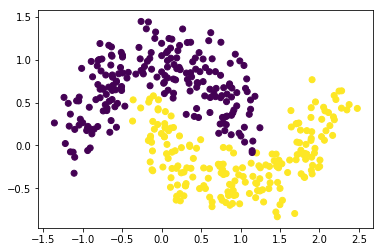

In [7]:
import matplotlib.pyplot as plt
from mlswarm.utils import convert_prob_into_class
%matplotlib inline 

#CLASSIFICATION VISUALIZED
Y_test_hat = nn.forward_propagation(X_test, cloud = nn.cloud_mean)
plt.scatter(X_test[:,0],X_test[:,1], c = convert_prob_into_class(Y_test_hat).flatten())